# Model Optimization

In [18]:
len(range(1,X.shape[1]+1,4))

10

In [36]:
from datetime import datetime

import numpy as np
import pandas as pd
from IPython.display import display

from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.feature_selection import SelectKBest, f_classif

def do_grid_search(mod_clf, mod_name, params, cv=5, scoring='accuracy', variant=None):
    params['kbest__k'] = [5]#range(1,X.shape[1]+1,1)
    clf = Pipeline([
        ('standardization', StandardScaler()),
        ('oversampler', RandomOverSampler()),
        ('kbest', SelectKBest(score_func=f_classif)),
        ('classifier', mod_clf)
    ])
#     with mu.Timer('Hyperparameter Grid Search for %s' %mod_name):
    best = mu.grid_search_optimization(clf, params, X, y, Xh, yh, Xv, yv, cv=cv, scoring=scoring)
    accuracy = {
        "model" : mod_name, 
        "mean_cv_acc" : best.best_estimator_.score(X,y),
        "holdout_acc" : best.best_estimator_.score(Xh,yh),
        "validation_acc" : best.best_estimator_.score(Xv,yv),
        "date_modified" : datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "best_params" : str(best.best_params_),
        "variant" : variant,
        "cv": cv
    }
    return accuracy

def getData(data_file):
    try:
        return pd.read_csv(data_file, index_col=0)
    except:
        pass
    return pd.DataFrame()

def addData(new_data, data_file, save=True):
    df = getData(data_file = data_file)
    df = df.append(new_data, ignore_index=True)
    if save:
        saveData(df, data_file = data_file)
    return df
    
def saveData(df, data_file):
    df[['model', 'mean_cv_acc', 'holdout_acc', 'validation_acc', 'cv', 'best_params', 'date_modified', 'variant']].to_csv(data_file)
    
def showData(df, name):
    if name:
        display(df.loc[df.model == name].set_index('model')[['mean_cv_acc', 'holdout_acc', 'validation_acc', 'date_modified', 'variant']])
    else:
        display(df.set_index('model')[['mean_cv_acc', 'holdout_acc', 'validation_acc', 'date_modified', 'variant']])
            
def delete_row(data_file, index = None, last=False):
    if not (index or last):
        return
    df = getData(data_file = data_file)
    if last:
        df = df.drop(df.index[len(df)-1])
    if index:
        df = df.drop(index)
    saveData(df, data_file = data_file)
    return df

def plot_results(title, data_file, plot_file, variant=None):
    %matplotlib inline
        
    d = getData(data_file = data_file).groupby('model').first()

    if variant:
        title = '%s (%s)' %(title, variant)
    
    ax = d.drop(['cv'], axis=1).plot(kind='bar', figsize=(10,6), rot=0)
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_ybound((0,1.1))
    ax.set_title(title)
    l = ax.legend(labels=['cross-val accuracy','holdout accuracy', 'validation accuracy'])
    fig = ax.get_figure()
    fig.savefig('images/%s'%plot_file)

    plt.show()

====
====
====                         Starting Control vs. All Parkinsons
====                                      FSS_K5_knn
====
====
# Tuning hyper-parameters for accuracy

Fitting 2 folds for each of 180 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 313 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 345 out of 360 | elapsed:   11.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   11.6s finished


Best parameters set found on development set:

{'classifier__n_neighbors': 5, 'classifier__p': 9, 'classifier__weights': 'distance', 'kbest__k': 5}

Grid scores on development set:

0.894 (+/-0.023) for {'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'uniform', 'kbest__k': 5}
0.886 (+/-0.020) for {'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'distance', 'kbest__k': 5}
0.874 (+/-0.010) for {'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'uniform', 'kbest__k': 5}
0.889 (+/-0.007) for {'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'distance', 'kbest__k': 5}
0.894 (+/-0.037) for {'classifier__n_neighbors': 5, 'classifier__p': 3, 'classifier__weights': 'uniform', 'kbest__k': 5}
0.872 (+/-0.007) for {'classifier__n_neighbors': 5, 'classifier__p': 3, 'classifier__weights': 'distance', 'kbest__k': 5}
0.896 (+/-0.034) for {'classifier__n_neighbors': 5, 'classifier__p': 4, 'classifier__weig

,mean_cv_acc,holdout_acc,validation_acc,date_modified,variant
model,,,,,
knn,1.0,0.897059,0.954545,2018-07-14 20:49:06,FSS_K5_knn
knn,1.0,0.916667,0.977273,2018-07-14 21:24:23,FSS_K5_knn


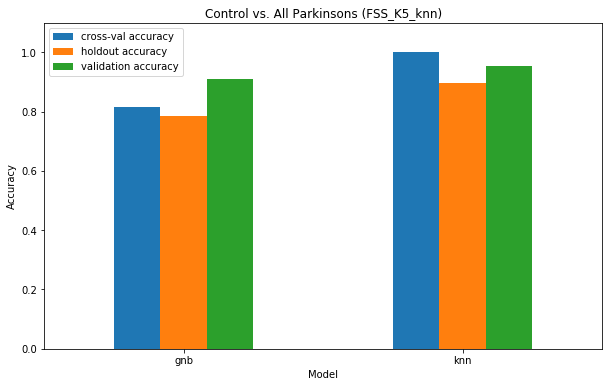

====
====
====                         Starting Idiopathic vs. Atypical Parkinsons
====                                      FSS_K5_knn
====
====
# Tuning hyper-parameters for accuracy

Fitting 2 folds for each of 180 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    9.5s finished


Best parameters set found on development set:

{'classifier__n_neighbors': 69, 'classifier__p': 9, 'classifier__weights': 'uniform', 'kbest__k': 5}

Grid scores on development set:

0.790 (+/-0.066) for {'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'uniform', 'kbest__k': 5}
0.782 (+/-0.012) for {'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'distance', 'kbest__k': 5}
0.770 (+/-0.003) for {'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'uniform', 'kbest__k': 5}
0.807 (+/-0.012) for {'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'distance', 'kbest__k': 5}
0.772 (+/-0.062) for {'classifier__n_neighbors': 5, 'classifier__p': 3, 'classifier__weights': 'uniform', 'kbest__k': 5}
0.782 (+/-0.081) for {'classifier__n_neighbors': 5, 'classifier__p': 3, 'classifier__weights': 'distance', 'kbest__k': 5}
0.767 (+/-0.022) for {'classifier__n_neighbors': 5, 'classifier__p': 4, 'classifier__weig

,mean_cv_acc,holdout_acc,validation_acc,date_modified,variant
model,,,,,
knn,0.871287,0.8750,0.812500,2018-07-14 20:49:20,FSS_K5_knn
knn,0.858911,0.8125,0.890625,2018-07-14 21:24:33,FSS_K5_knn


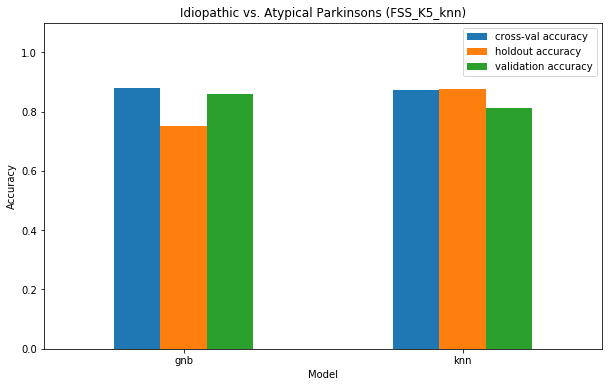

====
====
====                         Starting MSA vs. PSP
====                                      FSS_K5_knn
====
====
# Tuning hyper-parameters for accuracy

Fitting 2 folds for each of 180 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s


Best parameters set found on development set:

{'classifier__n_neighbors': 12, 'classifier__p': 5, 'classifier__weights': 'distance', 'kbest__k': 5}

Grid scores on development set:

0.729 (+/-0.017) for {'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'uniform', 'kbest__k': 5}
0.671 (+/-0.133) for {'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'distance', 'kbest__k': 5}
0.694 (+/-0.087) for {'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'uniform', 'kbest__k': 5}
0.729 (+/-0.064) for {'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'distance', 'kbest__k': 5}
0.706 (+/-0.017) for {'classifier__n_neighbors': 5, 'classifier__p': 3, 'classifier__weights': 'uniform', 'kbest__k': 5}
0.706 (+/-0.064) for {'classifier__n_neighbors': 5, 'classifier__p': 3, 'classifier__weights': 'distance', 'kbest__k': 5}
0.718 (+/-0.087) for {'classifier__n_neighbors': 5, 'classifier__p': 4, 'classifier__wei

[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    7.5s finished


,mean_cv_acc,holdout_acc,validation_acc,date_modified,variant
model,,,,,
knn,1.0,0.818182,0.625,2018-07-14 21:24:42,FSS_K5_knn


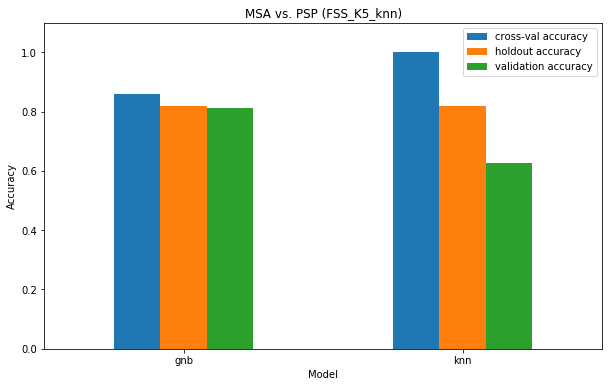

In [39]:
import ml_utils as mu
import matplotlib.pyplot as plt

cv = 2
variant = 'FSS_K5_knn'

groupings = [
    {'name': 'cvp', 'grouping':{0:0, 1:1, 2:1, 3:1}, 'description':'Control vs. All Parkinsons'},
    {'name': 'iva', 'grouping':{1:1, 2:2, 3:2},'description':'Idiopathic vs. Atypical Parkinsons'},
    {'name': 'mvp', 'grouping':{2:2, 3:3},'description':'MSA vs. PSP'}
]

mods = mu.get_baseline_models()
mods = [x for x in mods if x['name'] in ['knn']]

for grouping in groupings:
    print("===================================================================================")
    print("====")
    print("====")
    print("====                         Starting %s" %grouping['description'])
    if variant: print("====                                      %s" %variant)
    print("====")
    print("====")
    print("===================================================================================")
    with mu.HiddenPrints():
        X, y , Xh, yh, Xv, yv = mu.get_training_holdout_validation_data(grouping['grouping'])

    results_file = 'test_%s.csv'%(grouping['name'])
    if variant:
        plot_file = '%s_%s_accuracy.png' %(results_file.split('.')[0], variant)
    else:
        plot_file = '%s_accuracy.png' %(results_file.split('.')[0])
    
    for m in mods:
        mod_clf = m['model']
        mod_name = m['name']
        params = m['params']
        
        if mod_name == 'knn':
            params['classifier__n_neighbors'] = np.linspace(5,round((1 - 1.0/cv)*len(y) - 5),10, dtype = int)

        accuracy = do_grid_search(mod_clf, mod_name, params, cv=cv, variant=variant)
        df = addData(accuracy, data_file = results_file)
        showData(df, mod_name)

    plot_results(title=grouping['description'], data_file=results_file, plot_file=plot_file, variant=variant)